In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
data = pd.read_csv('./commodity_trade_statistics_data.csv')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head(10)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,87581,5320.0,Number of items,115180.0,01_live_animals
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals
8,Albania,2016,10591,"Fowls, live domestic > 185 grams",Import,2421513,1926850.0,Number of items,1006990.0,01_live_animals
9,Albania,2016,10599,"Poultry, live except domestic fowls, > 185 grams",Import,251318,211177.0,Number of items,205124.0,01_live_animals


In [4]:
# Join region data. We'll need it for later
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")

In [5]:
countries.head(10)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
5,Burundi,AFRICA
6,Cameroon,AFRICA
7,Cape Verde,AFRICA
8,Central African Republic,AFRICA
9,Chad,AFRICA


In [6]:
data = data.merge(countries, left_on='country_or_area', right_on='Country', how='left')

In [7]:
data.head(10)

,country_or_area,year,comm_code,commodity,flow,trade_usd,weight_kg,quantity_name,quantity,category,Country,Region
0,Afghanistan,2016,10410,"Sheep, live",Export,6088,2339.0,Number of items,51.0,01_live_animals,Afghanistan,ASIA
1,Afghanistan,2016,10420,"Goats, live",Export,3958,984.0,Number of items,53.0,01_live_animals,Afghanistan,ASIA
2,Afghanistan,2008,10210,"Bovine animals, live pure-bred breeding",Import,1026804,272.0,Number of items,3769.0,01_live_animals,Afghanistan,ASIA
3,Albania,2016,10290,"Bovine animals, live, except pure-bred breeding",Import,2414533,1114023.0,Number of items,6853.0,01_live_animals,Albania,EUROPE
4,Albania,2016,10392,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,9484953.0,Number of items,96040.0,01_live_animals,Albania,EUROPE
5,Albania,2016,10511,"Fowls, live domestic < 185 grams",Import,2671732,254652.0,Number of items,5629138.0,01_live_animals,Albania,EUROPE
6,Albania,2016,10511,"Fowls, live domestic < 185 grams",Export,87581,5320.0,Number of items,115180.0,01_live_animals,Albania,EUROPE
7,Albania,2016,10519,"Poultry, live except domestic fowls, < 185 grams",Import,26485,2908.0,Number of items,64000.0,01_live_animals,Albania,EUROPE
8,Albania,2016,10591,"Fowls, live domestic > 185 grams",Import,2421513,1926850.0,Number of items,1006990.0,01_live_animals,Albania,EUROPE
9,Albania,2016,10599,"Poultry, live except domestic fowls, > 185 grams",Import,251318,211177.0,Number of items,205124.0,01_live_animals,Albania,EUROPE


In [8]:
data.dtypes

country_or_area     object
year                 int64
comm_code           object
commodity           object
flow                object
trade_usd            int64
weight_kg          float64
quantity_name       object
quantity           float64
category            object
Country             object
Region              object
dtype: object

In [9]:
data['flow'] = data['flow'].astype('category')

In [10]:
data.shape

(8225871, 12)

In [11]:
# Check for NA colums
data.isnull().sum()

country_or_area          0
year                     0
comm_code                0
commodity                0
flow                     0
trade_usd                0
weight_kg           128475
quantity_name            0
quantity            304857
category                 0
Country            1355658
Region             1355658
dtype: int64

In [12]:
# For now, we don't really care about the following columns

data.drop(['comm_code', 'weight_kg', 'quantity_name', 'quantity'], axis = 1, inplace=True)

In [13]:
data.head(5)

,country_or_area,year,commodity,flow,trade_usd,category,Country,Region
0,Afghanistan,2016,"Sheep, live",Export,6088,01_live_animals,Afghanistan,ASIA
1,Afghanistan,2016,"Goats, live",Export,3958,01_live_animals,Afghanistan,ASIA
2,Afghanistan,2008,"Bovine animals, live pure-bred breeding",Import,1026804,01_live_animals,Afghanistan,ASIA
3,Albania,2016,"Bovine animals, live, except pure-bred breeding",Import,2414533,01_live_animals,Albania,EUROPE
4,Albania,2016,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,01_live_animals,Albania,EUROPE


In [14]:
is_export = data['flow'] == 'Export'
is_reexport = data['flow'] == 'Re-Export'
is_import = data['flow'] == 'Import'
is_reimport = data['flow'] == 'Import'

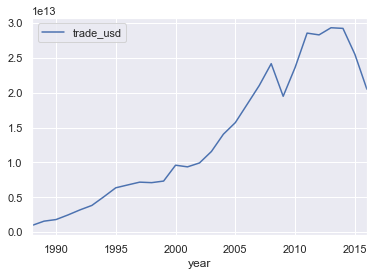

In [15]:
data[is_export | is_reexport].groupby('year').sum().plot()

In [16]:
data.flow.unique()

[Export, Import, Re-Export, Re-Import]
Categories (4, object): [Export, Import, Re-Export, Re-Import]

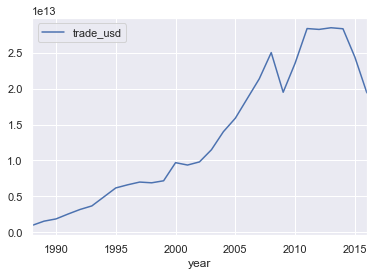

In [17]:
data[is_import | is_reimport].groupby('year').sum().plot()

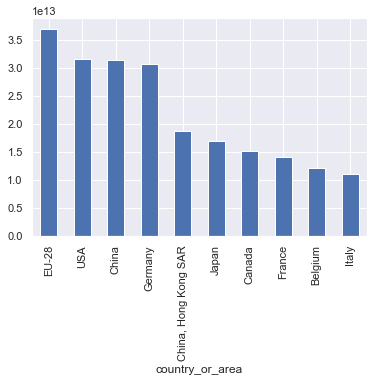

In [18]:
# Countries with highest export and import

data[is_export | is_reexport].groupby('country_or_area')['trade_usd'].sum().sort_values(ascending=False).head(10).plot.bar()

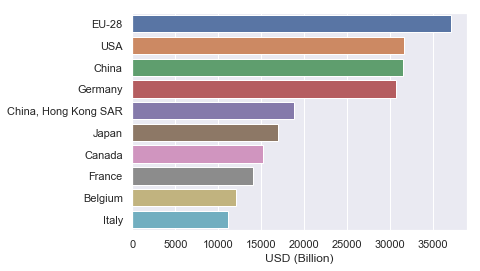

In [19]:
# Countries with highest export
highest_export_countries_series = data[is_export | is_reexport].groupby('country_or_area')['trade_usd'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=highest_export_countries_series.index, x=highest_export_countries_series.divide(pow(10, 9)).values, orient="h")
# plt.xticks(rotation=90)
plt.xlabel("USD (Billion)");
plt.ylabel("");

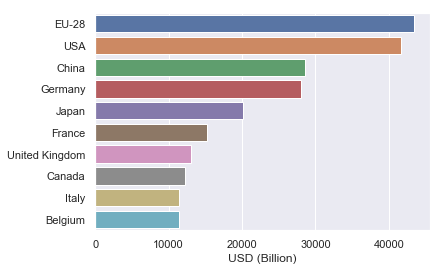

In [20]:
# Countries with highest import
highest_import_countries = data[is_import | is_reimport].groupby('country_or_area')['trade_usd'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=highest_import_countries.index, x=highest_import_countries.divide(pow(10, 9)).values, orient='h')
#plt.xticks(rotation=90)
plt.xlabel("USD (Billion)");
plt.ylabel("");

In [21]:
# When does EU-28 appear at all?

data[data['country_or_area'] == 'EU-28'].year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [22]:
# Split commodities by name, etc.

In [23]:
data.head(10)

,country_or_area,year,commodity,flow,trade_usd,category,Country,Region
0,Afghanistan,2016,"Sheep, live",Export,6088,01_live_animals,Afghanistan,ASIA
1,Afghanistan,2016,"Goats, live",Export,3958,01_live_animals,Afghanistan,ASIA
2,Afghanistan,2008,"Bovine animals, live pure-bred breeding",Import,1026804,01_live_animals,Afghanistan,ASIA
3,Albania,2016,"Bovine animals, live, except pure-bred breeding",Import,2414533,01_live_animals,Albania,EUROPE
4,Albania,2016,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,01_live_animals,Albania,EUROPE
5,Albania,2016,"Fowls, live domestic < 185 grams",Import,2671732,01_live_animals,Albania,EUROPE
6,Albania,2016,"Fowls, live domestic < 185 grams",Export,87581,01_live_animals,Albania,EUROPE
7,Albania,2016,"Poultry, live except domestic fowls, < 185 grams",Import,26485,01_live_animals,Albania,EUROPE
8,Albania,2016,"Fowls, live domestic > 185 grams",Import,2421513,01_live_animals,Albania,EUROPE
9,Albania,2016,"Poultry, live except domestic fowls, > 185 grams",Import,251318,01_live_animals,Albania,EUROPE


In [24]:
data['commodity1'] = data['commodity'].str.split(', ', expand=True)[0]

In [25]:
data.head(3)

,country_or_area,year,commodity,flow,trade_usd,category,Country,Region,commodity1
0,Afghanistan,2016,"Sheep, live",Export,6088,01_live_animals,Afghanistan,ASIA,Sheep
1,Afghanistan,2016,"Goats, live",Export,3958,01_live_animals,Afghanistan,ASIA,Goats
2,Afghanistan,2008,"Bovine animals, live pure-bred breeding",Import,1026804,01_live_animals,Afghanistan,ASIA,Bovine animals


In [26]:
grouped_commodities = data.groupby(['commodity1'])['trade_usd'].sum().sort_values(ascending=False)

In [27]:
grouped_commodities = grouped_commodities.iloc[2:] # Skip the first two, because they are unlabeled ones

In [28]:
grouped_commodities.head(10)

commodity1
Petroleum oils                          19371219043266
Oils petroleum                           9908068171288
Medicaments nes                          5673386213407
Fixed wing aircraft                      4771242424124
Automobiles                              3815875336595
Natural gas in gaseous state             3009010078232
Iron ore                                 2769099260317
Gold in unwrought forms non-monetary     2450868664907
Aircraft parts nes                       2383857071603
Natural gas                              1868022196139
Name: trade_usd, dtype: int64

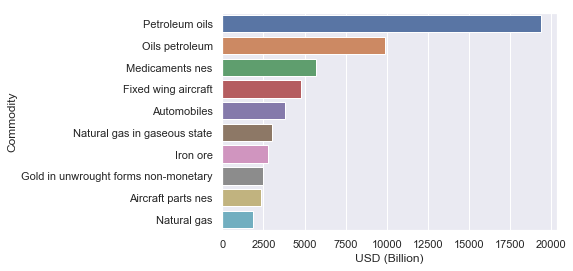

In [29]:
sns.barplot(x=grouped_commodities.head(10).divide(pow(10,9)).values, y=grouped_commodities.head(10).index, orient='h')
plt.xlabel("USD (Billion)");
plt.ylabel("Commodity");

In [30]:
# Facet data by year ... For this, we'll need a new data

grouped_commodities_by_year = data.groupby(['commodity1', 'year'])[['trade_usd']].sum().sort_values(by='trade_usd', ascending=False)
grouped_commodities_by_year.drop(['ALL COMMODITIES', 'Commodities not specified according to kind'], inplace=True)
grouped_commodities_by_year = grouped_commodities_by_year.reset_index(level='year')

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [60]:
grouped_commodities_by_year.reset_index().trade_usd.values

array([1940070817146, 1893893173495, 1891789446855, ...,             4,
                   3,             1])

In [67]:
# Define a custom mapping function so that we can plot only top 10 countries
def top10barplot(data, **kwargs):
    #print(data.head(3))
#     print(data.value_counts().sort_values().index[:10])
    sns.barplot(x='trade_usd', y='commodity1', data=data, orient='h')

In [ ]:
grid = sns.FacetGrid(grouped_commodities_by_year.reset_index(), col="year", col_wrap=2, size=4, aspect=1, sharey=False, sharex=False)
#grid.map_dataframe(top10barplot)

In [109]:
# Limit the data for testing purposes
limited_set = grouped_commodities_by_year[grouped_commodities_by_year['year'] >= 2000]
limited_set['trade_usd_billion'] = limited_set['trade_usd'] / pow(10, 9)

/Users/mihailojoksimovic/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


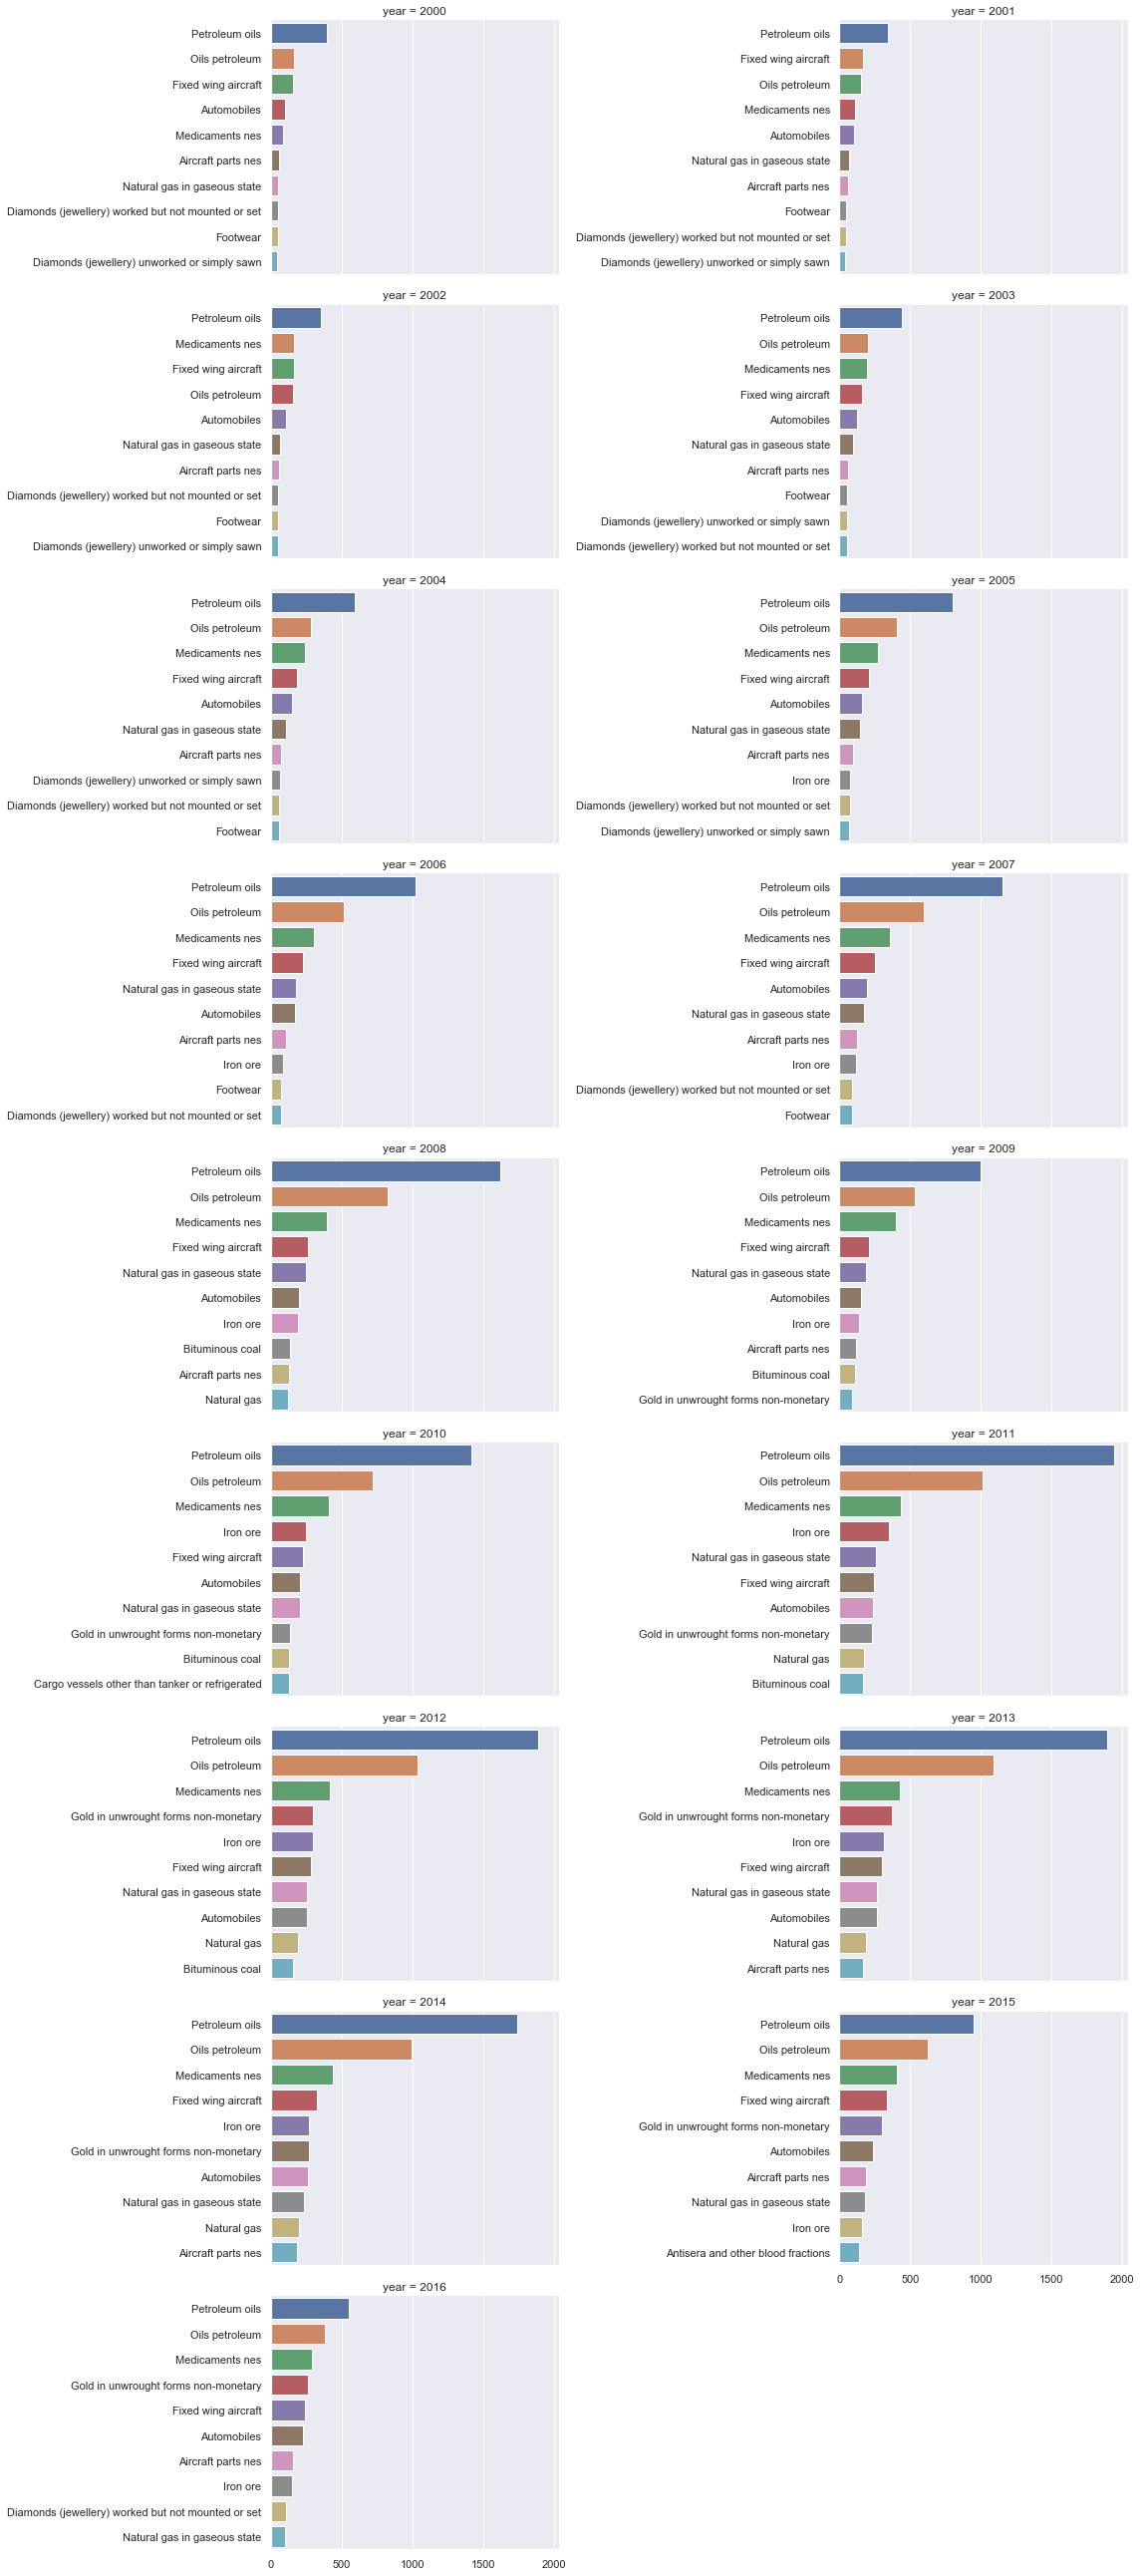

In [110]:
# Define a custom mapping function so that we can plot only top 10 countries
def top10barplot(data, **kwargs):
    ax = sns.barplot(x='trade_usd_billion', y='commodity1', data=data.head(10), orient='h')
    
grid = sns.FacetGrid(limited_set.reset_index(), col="year", col_wrap=2, height=4, aspect=2, sharey=False)
g = grid.map_dataframe(top10barplot)

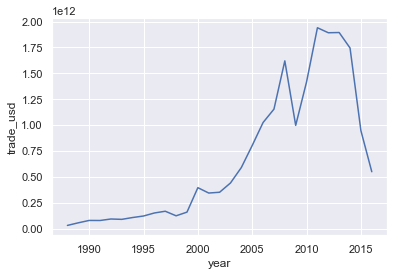

In [125]:
sns.lineplot(x='year', y='trade_usd', data=grouped_commodities_by_year.loc['Petroleum oils'])

In [126]:
# Let's analyze most popular commodities in terms of export amount (in quantity)

In [127]:
data.head(5)

,country_or_area,year,commodity,flow,trade_usd,category,Country,Region,commodity1
0,Afghanistan,2016,"Sheep, live",Export,6088,01_live_animals,Afghanistan,ASIA,Sheep
1,Afghanistan,2016,"Goats, live",Export,3958,01_live_animals,Afghanistan,ASIA,Goats
2,Afghanistan,2008,"Bovine animals, live pure-bred breeding",Import,1026804,01_live_animals,Afghanistan,ASIA,Bovine animals
3,Albania,2016,"Bovine animals, live, except pure-bred breeding",Import,2414533,01_live_animals,Albania,EUROPE,Bovine animals
4,Albania,2016,"Swine, live except pure-bred breeding > 50 kg",Import,14265937,01_live_animals,Albania,EUROPE,Swine
